## importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,f1_score,recall_score
from sklearn.model_selection import cross_val_predict, cross_val_score

warnings.filterwarnings('ignore')

## reading the required dataset

In [2]:
df1=pd.read_csv("HR_comma_sep.csv")

In [3]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## data preprocessing

In [4]:
df2=df1.rename(columns={'sales':'department','average_montly_hours':'average_monthly_hours'})

In [5]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## understanding the data

In [6]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_monthly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [8]:
df2.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df2.shape

(14999, 10)

## checking for null

In [11]:
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

## exploratory data analysis

In [12]:
df2['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

<AxesSubplot:xlabel='left', ylabel='count'>

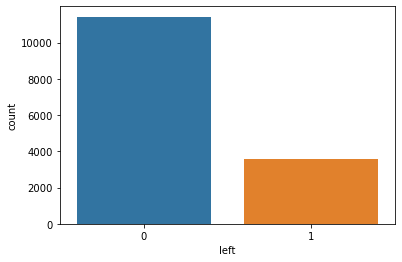

In [13]:
sns.countplot(df2.left)

In [14]:
df2.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [15]:
df2.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [16]:
df2.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

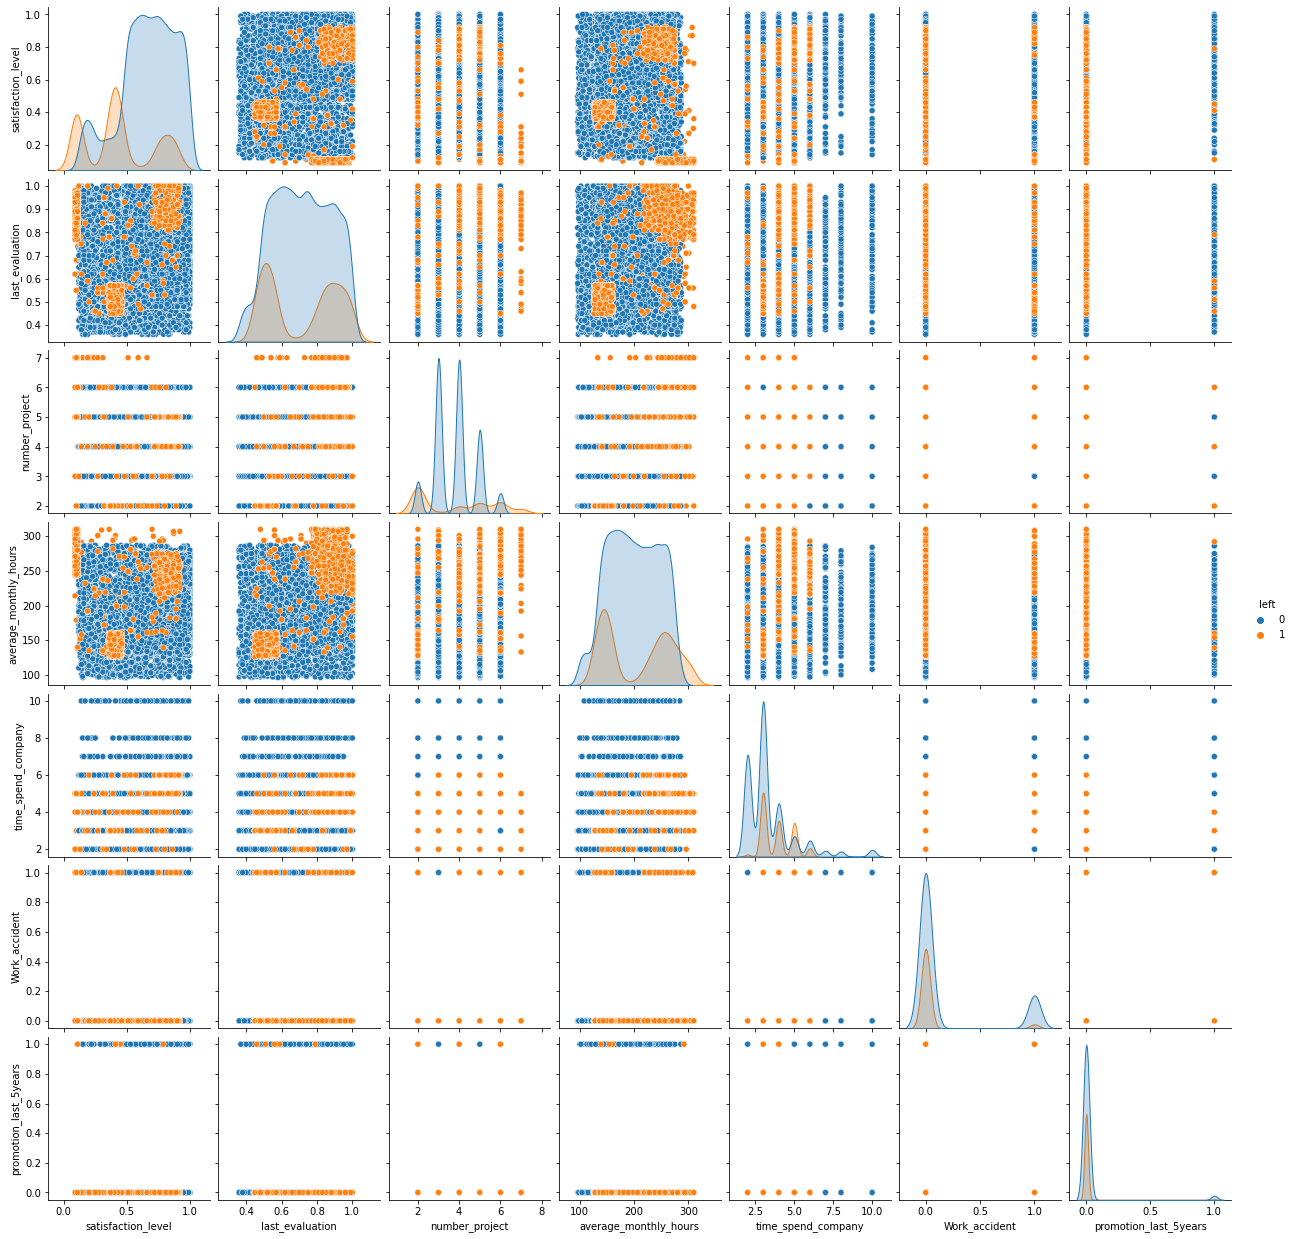

In [17]:
sns.pairplot(df2,hue='left')

In [18]:
pd.crosstab(df2['department'],df2['salary']).style.background_gradient()

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Text(0, 0.5, 'Count of Department')

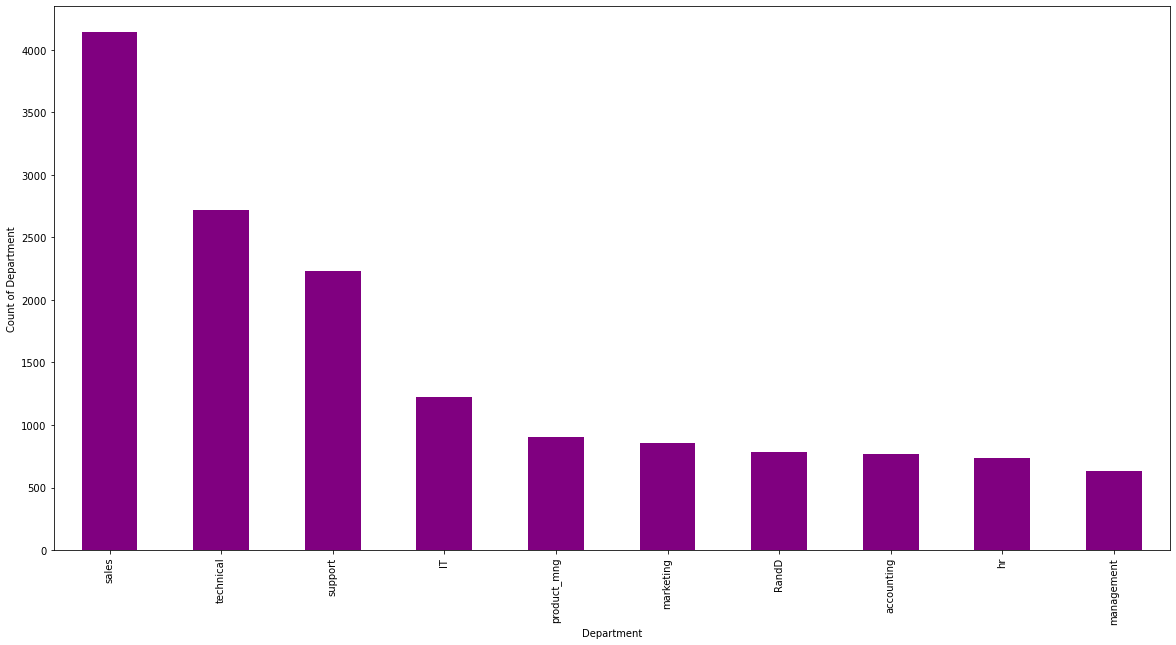

In [19]:
plt.rcParams['figure.figsize']=(20,10)
df2['department'].value_counts().plot(kind='bar',color='purple')
plt.xlabel("Department")
plt.ylabel("Count of Department")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

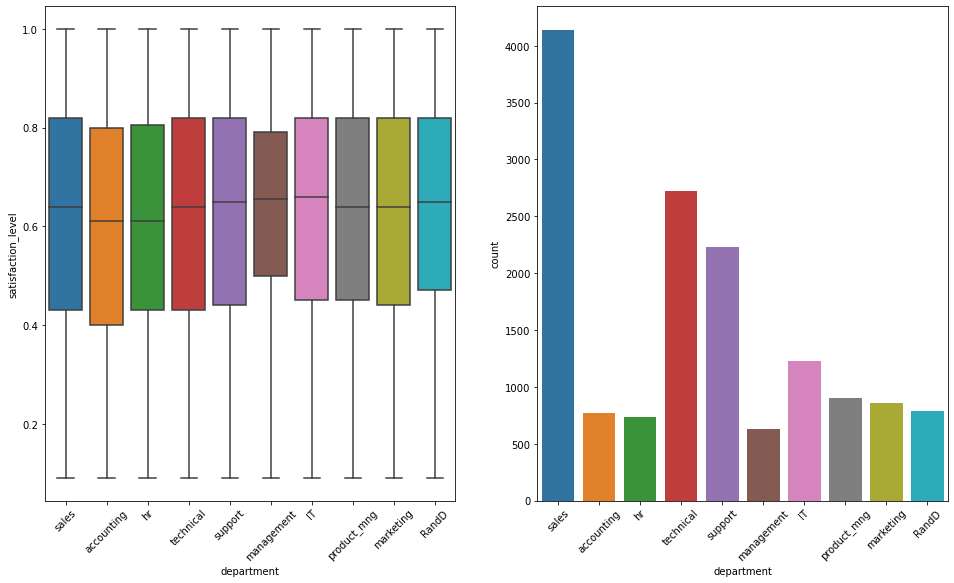

In [20]:
plt.rcParams['figure.figsize']=(25,20)
plt.subplot(2,3,1)
sns.boxplot(x=df2['department'],y=df2['satisfaction_level'])
plt.xticks(rotation=45)
plt.subplot(2,3,2)
sns.countplot(df2['department'])
plt.xticks(rotation=45)

## checking for outliers

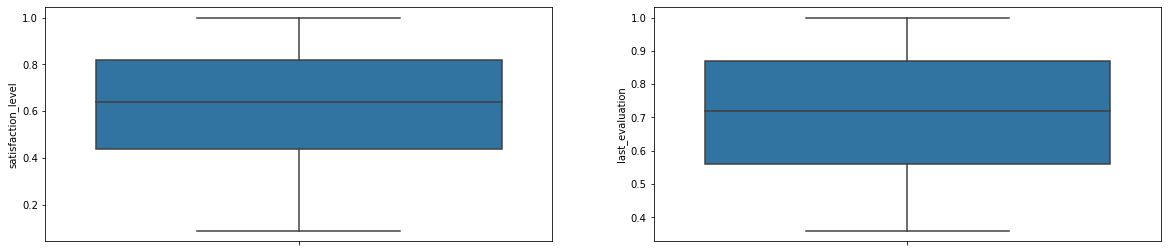

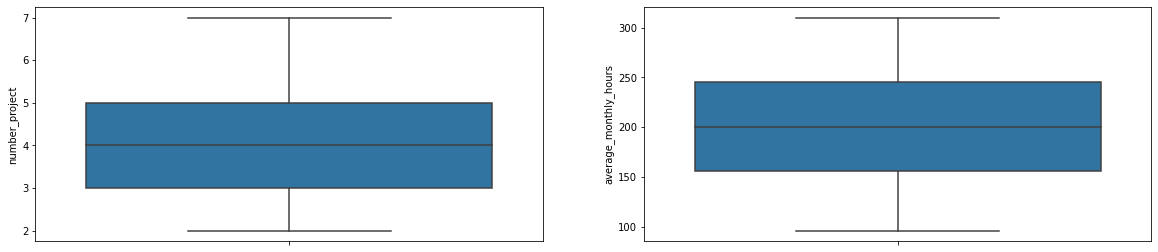

In [21]:
def boxplot(column,x):
    plt.subplot(5,2,x)
    sns.boxplot(y=df2[column])
plt.figure(figsize=(20,25))

boxplot('satisfaction_level',1)
boxplot('last_evaluation',2)

plt.figure(figsize=(20,25))
boxplot('number_project',1)
boxplot('average_monthly_hours',2)

<AxesSubplot:xlabel='left', ylabel='number_project'>

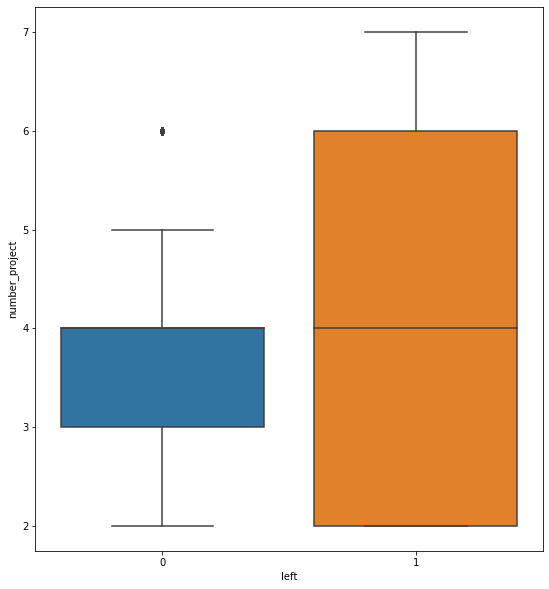

In [22]:
plt.rcParams['figure.figsize']=(20,10)
plt.subplot(1,2,1)
sns.boxplot(x=df2['left'],y=df2['number_project'],)

## plotting the correlation

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'satisfaction_level'),
  Text(0, 1.5, 'last_evaluation'),
  Text(0, 2.5, 'number_project'),
  Text(0, 3.5, 'average_monthly_hours'),
  Text(0, 4.5, 'time_spend_company'),
  Text(0, 5.5, 'Work_accident'),
  Text(0, 6.5, 'left'),
  Text(0, 7.5, 'promotion_last_5years')])

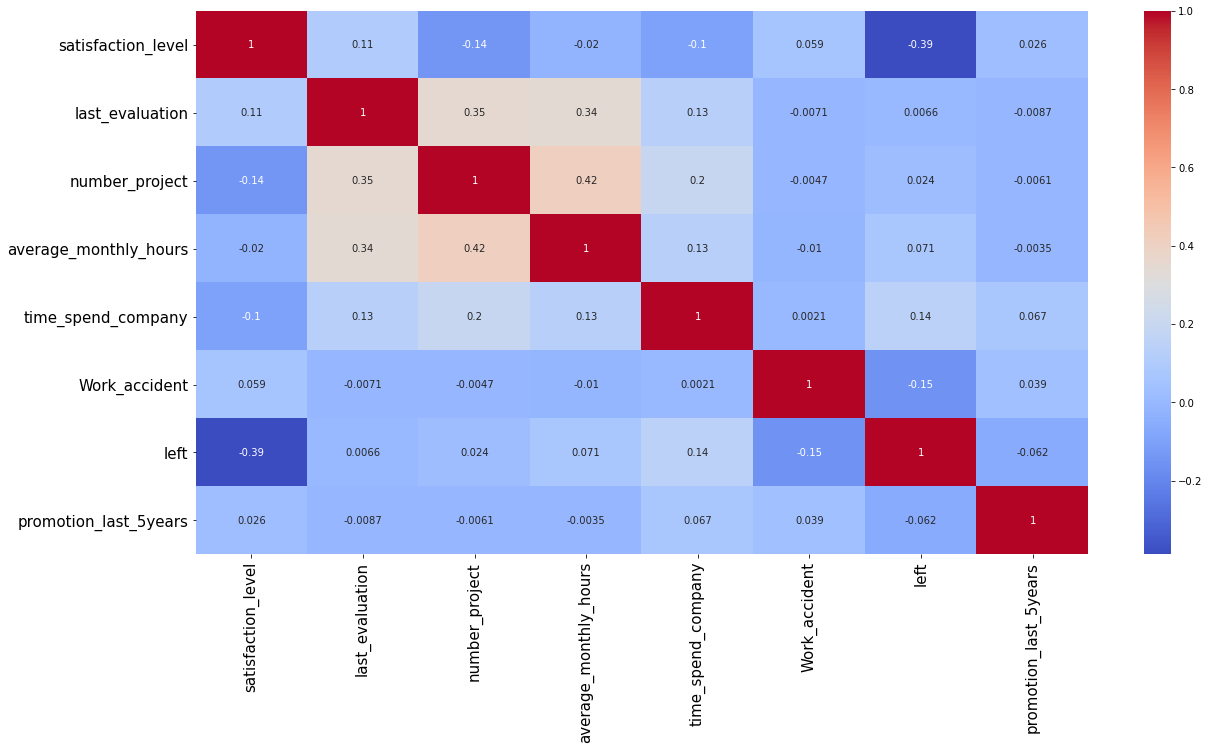

In [23]:
sns.heatmap(df2.corr(),annot=True,cbar=True,cmap='coolwarm')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## encoding

In [24]:
le=LabelEncoder()
df2['salary']=le.fit_transform(df2['salary'])
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [25]:
df2=pd.get_dummies(df2,drop_first=True )
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [26]:
df2.columns 

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

## splitting the data into 2 parts for training and testing

In [27]:
x=df2.loc[:,df2.columns!='left']
y=df2.loc[:,df2.columns=='left']

In [28]:
x

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,1,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,1,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,1,0,0,0,0,0,0,0,1,0


In [29]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [30]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=7)

In [31]:
xtrain.shape

(11999, 17)

In [32]:
xtest.shape

(3000, 17)

## scaling the data

In [33]:
sc=MinMaxScaler()
xtrain=pd.DataFrame(sc.fit_transform(xtrain,ytrain ),index=xtrain.index,columns=xtrain.columns)

In [34]:
xtrain.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
14842,0.274725,0.484375,0.4,0.210280,0.000,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13070,0.703297,0.515625,0.2,0.616822,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10444,0.593407,0.828125,0.2,0.668224,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7885,0.692308,0.375000,0.2,0.789720,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7796,0.527473,0.765625,0.4,0.261682,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
xtest=pd.DataFrame(sc.transform(xtest),index=xtest.index,columns=xtest.columns)

In [36]:
xtest.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
404,0.736264,0.796875,0.6,0.696262,0.375,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5221,0.725275,0.187500,0.0,0.878505,0.500,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3357,0.681319,0.515625,0.4,0.392523,0.125,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7336,0.472527,0.609375,0.4,0.794393,0.125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8313,0.142857,0.625000,0.4,0.373832,0.500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## implementing random forest ml Algorithm

In [37]:
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(xtrain,ytrain)

predict=rf_model.predict(xtest)
rf_acc=accuracy_score(ytest,predict)
rf_acc

0.9893333333333333

In [38]:
featimp=pd.Series(rf_model.feature_importances_,index=x.columns)
featimp

satisfaction_level        0.310125
last_evaluation           0.126286
number_project            0.180952
average_monthly_hours     0.153317
time_spend_company        0.189171
Work_accident             0.009752
promotion_last_5years     0.001900
salary                    0.011171
department_RandD          0.001484
department_accounting     0.001259
department_hr             0.001118
department_management     0.001565
department_marketing      0.001146
department_product_mng    0.000964
department_sales          0.003355
department_support        0.002990
department_technical      0.003448
dtype: float64

## selecting important features

In [39]:
important_features = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']

In [40]:
important_features=df2.iloc[:,:5]
important_features.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


## testing data with all features

In [41]:
rf_model=RandomForestClassifier(n_estimators=100)
scores2 = cross_val_score(rf_model, x , y , cv = 10, scoring = 'accuracy' ) 

rf_acc_with_all_feature=scores2.mean()
rf_acc_with_all_feature

0.9928000000000001

## testing data with important features

In [42]:
rf_model=RandomForestClassifier(n_estimators=100)
scores2 = cross_val_score(rf_model, important_features , y , cv = 10, scoring = 'accuracy' ) 

rf_acc_imp_feature=scores2.mean()
rf_acc_imp_feature

0.9928666666666667

In [43]:
models=["RandomForestClassifier"]
Accuracy_Train_Test=[rf_acc]
Accuracy_with_all_features=[rf_acc_with_all_feature]    
Accuracy_with_important_features=[rf_acc_imp_feature]

## displaying accuracy

In [44]:
score= ({"Classification Model" :models,"Accuracy Train_Test":Accuracy_with_all_features,
                     "Accuracy with all features(Kfold)":Accuracy_with_all_features,
                    "Accuracy with important features(Kfold)":Accuracy_with_important_features})
for key in score.keys():
    print (key,":",score[key])

Classification Model : ['RandomForestClassifier']
Accuracy Train_Test : [0.9928000000000001]
Accuracy with all features(Kfold) : [0.9928000000000001]
Accuracy with important features(Kfold) : [0.9928666666666667]
